In [ ]:

###### array modules ######
import pandas as pd
import numpy as np
import bz2
###### basic modules ######
from collections import Counter
import tqdm, os, gc, subprocess, zipfile, gdown, pickle
#!pip install gdown
from pathlib import Path
from termcolor import colored



In [ ]:
pip install preprocessing

In [ ]:
pip install wiki-dump-reader

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


install Flair embedding

In [ ]:
pip install flair


# Using ParsBert for Farsi

In [ ]:
from flair.embeddings import FlairEmbeddings, TransformerWordEmbeddings
bert_embedding = TransformerWordEmbeddings("HooshvareLab/bert-fa-base-uncased")

In [ ]:
from flair.embeddings import StackedEmbeddings

# now create the StackedEmbedding object that combines all embeddings
stacked_embeddings = StackedEmbeddings(
    embeddings=[bert_embedding])

In [ ]:
###### embedding creation modules ######
!pip install gensim==3.8.3
import gensim
from gensim.models import FastText
from gensim.models import Word2Vec

In [ ]:
from wiki_dump_reader import Cleaner, iterate
import  preprocessing as ps

cleaner = Cleaner()
file = open("/mydrive/My Drive/nlpproject/newwiki.txt",'w')

i=0
starting_words = {}
for title, text in iterate('/mydrive/My Drive/nlpproject/fawiki-20210101-pages-articles.xml'):
        i+=1
        print(i)
        text = cleaner.clean_text(text)
        cleaned_text, links = cleaner.build_links(text)
        file.write(cleaned_text)
        file.write("\n")

# Unzip of wiki dump

In [ ]:
f=open("/content/mydrive/My Drive/nlpproject/newwiki.txt",'r')
wikitext=f.readlines()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



In [ ]:
!pip install hazm
import spacy
from hazm import *

In [ ]:
!pip install parsivar
from parsivar import Tokenizer as T
my_tokenizer = T()
from parsivar import POSTagger
my_tagger = POSTagger(tagging_model="wapiti")

In [ ]:
from flair.data import Sentence

In [ ]:
def preprocessing_data(line, remove_stop_word=False,
                     lemmatize=False,
                     stem=False):
    line = normalizer.normalize(line)
    line = tokenizer.tokenize(line)
    if remove_stop_word:
        line = [word for word in line if word not in stop_w_list]
    if stem:
        line = [stemmer.stem(word) for word in line]
    if lemmatize:
        line = [lemmatizer.lemmatize(word) for word in line]
        line
    line = ' '.join(line)
    return line


stemmer = Stemmer()
lemmatizer = Lemmatizer()
sent_tokenizer = SentenceTokenizer()
normalizer = Normalizer()
tokenizer = WordTokenizer()
stop_w_list = stopwords_list()

### **UKB**

In [ ]:
def un_zip(path):
    if not os.path.exists(path):
      with zipfile.ZipFile(path+'.zip','r') as zip_ref:
          zip_ref.extractall(path)


save_path = "/content/mydrive/My Drive/ex1deep/"
Path(save_path).mkdir(parents=True, exist_ok=True)


url = 'https://drive.google.com/uc?id=1I3ifjvMdcwOTdw4vW0sZgpfh9E2h7NG-'
output = save_path + 'ukb.zip'
gdown.download(url, output, quiet=False)
un_zip(save_path + 'ukb')

Downloading...
From: https://drive.google.com/uc?id=1I3ifjvMdcwOTdw4vW0sZgpfh9E2h7NG-
To: /content/mydrive/My Drive/nlpproject/ukb.zip
23.8MB [00:00, 79.4MB/s]


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!pwd

/content/mydrive/My Drive/nlpproject/ukb/bin


In [ ]:
import os
os.chdir('/content/mydrive/My Drive/nlpproject/ukb/bin')

In [ ]:
!unzip '/content/mydrive/My Drive/nlpproject/ukb.zip' -d '/content/mydrive/My Drive/nlpproject' 

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt karshenas1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt karshenas1.txt
ctx_00 w1  13328-n/0.987518 11998-n/0.0124818 !! کارشناس


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt karshenas2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt karshenas2.txt
ctx_00 w2  13328-n/0.9759 11998-n/0.0241002 !! کارشناس


#  senteces for each word
**کارشناس**

In [ ]:
#num1
karshenas= []
for i in wikitext:
  if " کارشناس " in i:
    if(len(i)<350):
      i=i.replace("\u200c","")
      karshenas.append(i.rstrip("\n"))
    
#karshenas=karshenas[:200]


# Embedding of 200 sentences

In [ ]:
karshenas2=[]
c=0
sum=0
for i in karshenas:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    karshenas2.append(np.array(sum))

# Clustering with K-Means

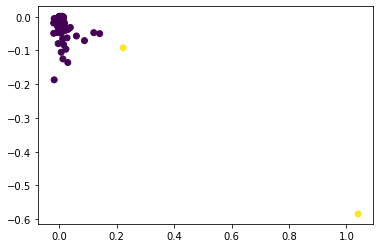

In [ ]:
karshenas2=np.array(karshenas2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(karshenas2)
y_kmeans = kmeans.predict(karshenas2)
labels=kmeans.labels_
plt.scatter(karshenas2[:, 0], karshenas2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2"])
for i in range(len(karshenas)):
  if labels[i]==0:
    df=df.append({"معنی1":karshenas[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":karshenas[i]}, ignore_index=True)
    

#removing NaN
df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2
0,نوشتار: لهجه فارسی کاکری، غلام حیدر یگانه - کا...,وبگاه ماهنامه ورزش خانواده سید جلال عسگری، کا...
1,نوشتار: لهجه فارسی کاکری، غلام حیدر یگانه - کا...,نوشتار: لهجه فارسی کاکری، غلام حیدر یگانه - کا...
2,احمد شهید کارشناس آزادی مذهبی سازمان ملل در سف...,
3,مهدی سیدی، پژوهشگر و کارشناس در زمینهٔ لهجه و ...,
4,از معروفترین آثار او به پارسی، «اساس الاقتباس»...,
...,...,...
930,۲. کارشناس رسمی قوه قضائیه / رشته بورس و اورا...,
931,۱۳. شرکت کارگزاری مفید / کارشناس و مسئول مرکز ...,
932,دلاور نجفی، کارشناس ارشد منابع طبیعی محیط زیست...,
933,تأیید و ثبت نام: مراحل بالا باید توسط یک کارشن...,


### **POS TAGGING**

In [ ]:
list1 = df['معنی1'].to_list()

mani1karshenas=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      mani1karshenas.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(mani1karshenas).most_common(6)]
print(most_common_words)

[('کارشناس', 'N_SING'), ('سال', 'N_SING'), ('ایران', 'N_SING'), ('عنوان', 'N_SING'), ('ارشد', 'ADJ'), ('دانشگاه', 'N_SING')]


In [ ]:
list1 = df['معنی2'].to_list()
mani2karshenas=[]

for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      mani2karshenas.append(i)

from collections import Counter 
most_common_words= [word for word, word_count in Counter(mani2karshenas).most_common(6)]
print(most_common_words)


[('ورزش', 'N_SING'), ('کارشناس', 'N_SING'), ('زبان', 'N_SING'), ('ادبیات', 'N_SING'), ('وبگاه', 'N_SING'), ('ماهنامه', 'N_SING')]


935

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt karshenas1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt karshenas1.txt
ctx_00 w1  13328-n/0.919972 11998-n/0.0800277 !! کارشناس


2

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt karshenas2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt karshenas2.txt
ctx_00 w2  13328-n/0.9759 11998-n/0.0241002 !! کارشناس


# بازار

In [ ]:
#word #2
bazar= []
counter=0
for i in wikitext:
  if " بازار " in i:
    if(len(i)<350):
      i=i.replace("\u200c","")
      bazar.append(i.rstrip("\n"))

#bazar=bazar[:200]

In [ ]:
bazar2=[]
c=0
sum=0
for i in bazar:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    bazar2.append(np.array(sum)) #matrix of arrays

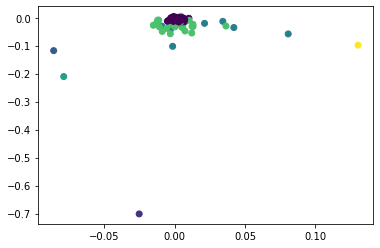

In [ ]:
bazar2=np.array(bazar2)
kmeans = KMeans(n_clusters=8, random_state=0).fit(bazar2)
y_kmeans = kmeans.predict(bazar2)
labels=kmeans.labels_
plt.scatter(bazar2[:, 0], bazar2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3","معنی4","معنی5","معنی6","معنی7","معنی8"])
mani3=0
mani7=0
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":bazar[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":bazar[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":bazar[i]}, ignore_index=True)
    mani3+=1
  elif labels[i]==3:
    df=df.append({"معنی4":bazar[i]}, ignore_index=True)
  elif labels[i]==4:
    df=df.append({"معنی5":bazar[i]}, ignore_index=True)

  elif labels[i]==5:
    df=df.append({"معنی6":bazar[i]}, ignore_index=True)
  elif labels[i]==6:
    df=df.append({"معنی7":bazar[i]}, ignore_index=True)
    mani7+=1
  elif labels[i]==7:
    df=df.append({"معنی8":bazar[i]}, ignore_index=True)


df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2,معنی3,معنی4,معنی5,معنی6,معنی7,معنی8
0,=== تأثیر بر صنعت و بازار کار ===,از مهمترین گروههایی که اریک در دهه ۶۰ با آنها ...,برخی از محلههای تهران نیز دارای پیشینهای تاریخ...,او در اواخر دهه ۶۰ و اوایل دهه ۷۰ میلادی اولین...,با وجود مراکز خرید نوین در شهر، بازار تهران به...,در سال ۲۰۰۴، آلبوم Sessions For Robert.J روانه...,فناوری نوآورد (cutting-edge) به فناوریای گفته ...,بزرگترین تولیدکنندگان سنگ کروم در سال ۲۰۱۹ آفر...
1,راسته بازار بناب,,شهر اراک: مسجد و مدرسه سپهداری، روستای تاریخی ...,,,,خیابان تربیت نیز به عنوان بخشی از جاده تاریخی ...,
2,میدپوینت و کارنسی فر بازار مبادله پول خارجی P2...,,از جمله گردشگاههای خمین میتوان به تیمچه بازار ...,,,,آبرسان از جمله مناطقی است که دارای مراکز تجاری...,
3,مسجد بازار ساوه - قدمت تاریخی دوره زندیه,,نوعی رایانه خانگی است. این رایانه خانگی ۸ بیتی...,,,,EC اتحادیه اروپا، که اتحادیه اقتصادی (EMU) در ...,
4,|محدودهٔ بازار سنتی پیشوا,,یک رایانهٔ شخصی است که در سال ۱۹۷۶ توسط شرکت ا...,,,,اولین هواپیمای تجاری جت نیز در سال ۱۹۵۲ به نام...,
...,...,...,...,...,...,...,...,...
151,سراهای معروف بازار تبریز عبارتند از سرای گرجیل...,,,,,,,
152,هر کدام از این سراها و تیمچهها و کاروانسراها ب...,,,,,,,
153,گرمابههای قدیمی و حمامهای تاریخی در محدودهٔ با...,,,,,,,
154,=== بازار امیر ===,,,,,,,


In [ ]:
list1 = df['معنی1'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(6)]
print(most_common_words)

[('بازار', 'N_SING'), ('شهر', 'N_SING'), ('سال', 'N_SING'), ('اقتصادی', 'ADJ'), ('کشور', 'N_SING'), ('است.', '.')]


In [ ]:
list1 = df['معنی2'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(6)]
print(most_common_words)

[('اریک', 'N_SING'), ('۶۰', 'NUM'), ('گروه', 'N_SING'), ('موسیقی', 'N_SING'), ('مهمترین', 'ADJ_SUP'), ('گروههایی', 'N_PL')]


In [ ]:
list1 = df['معنی3'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(6)]
print(most_common_words)

[('بازار', 'N_SING'), ('اپل', 'N_SING'), ('سال', 'N_SING'), ('رایانه', 'N_SING'), ('شرکت', 'N_SING'), ('تاریخی', 'ADJ')]


In [ ]:
list1 = df['معنی4'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

[('Top', 'FW'), ('اواخر', 'N_PL'), ('۶۰', 'NUM'), ('اوایل', 'N_PL'), ('۷۰', 'NUM'), ('میلادی', 'ADJ'), ('آلبوم', 'N_SING')]


In [ ]:
list1 = df['معنی5'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(6)]
print(most_common_words)

[('تهران', 'N_SING'), ('مراکز', 'N_PL'), ('خرید', 'N_SING'), ('نوین', 'ADJ'), ('شهر،', 'N_SING'), ('بازار', 'N_SING')]


In [ ]:
list1 = df['معنی6'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(10)]
print(most_common_words)

[('سال', 'N_SING'), ('۲۰۰۴،', 'NUM'), ('آلبوم', 'N_SING'), ('Sessions', 'FW'), ('For', 'FW'), ('Robert.J', 'N_SING'), ('روانه', 'ADJ'), ('بازار', 'N_SING'), ('شد؛', 'V_PA'), ('آن،', 'PRO')]


In [ ]:
list1 = df['معنی7'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(6)]
print(most_common_words)

[('بازار', 'N_SING'), ('اقتصاد', 'N_SING'), ('دولت', 'N_SING'), ('بازاریابی', 'N_SING'), ('آلبوم', 'N_SING'), ('کنسرت', 'N_SING')]


In [ ]:
list1 = df['معنی8'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(6)]
print(most_common_words)

[('سال', 'N_SING'), ('کروم', 'N_SING'), ('میلیارد', 'NUM'), ('دلار', 'N_SING'), ('بزرگترین', 'ADJ_SUP'), ('تولیدکنندگان', 'N_PL')]


155

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazar1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazar1.txt
ctx_00 w1  10713-n/0.31012 11807-n/0.288292 10714-n/0.145487 10274-n/0.0760892 14042-n/0.0707901 32822-n/0.0411642 27659-n/0.0387032 49460-n/0.0293544 !! بازار


1

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazar2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazar2.txt
ctx_00 w6  11807-n/0.327244 10713-n/0.147474 10274-n/0.12409 32822-n/0.115931 14042-n/0.112309 10714-n/0.0871031 27659-n/0.0724668 49460-n/0.0133832 !! بازار


7

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazar3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazar3.txt
ctx_00 w1  11807-n/0.231339 14042-n/0.21264 10713-n/0.186105 10714-n/0.12719 10274-n/0.0859847 27659-n/0.0797871 32822-n/0.0595664 49460-n/0.0173861 !! بازار


1

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazar4.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazar4.txt
ctx_00 w6  10714-n/0.276789 10713-n/0.16787 10274-n/0.132124 14042-n/0.123523 27659-n/0.101891 11807-n/0.0999232 32822-n/0.0839667 49460-n/0.0139115 !! بازار


1

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazar5.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazar5.txt
ctx_00 w6  27659-n/0.345933 11807-n/0.279545 10713-n/0.142961 14042-n/0.113432 10714-n/0.0518457 49460-n/0.0263881 10274-n/0.0248138 32822-n/0.0150809 !! بازار


1

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazar6.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazar6.txt
ctx_00 w5  32822-n/0.202534 14042-n/0.189103 10713-n/0.15153 10274-n/0.12352 10714-n/0.106688 11807-n/0.103772 27659-n/0.0906494 49460-n/0.0322037 !! بازار


32

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazar7.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazar7.txt
ctx_00 w1  10713-n/0.258808 10714-n/0.229448 11807-n/0.148008 14042-n/0.147606 27659-n/0.0879093 10274-n/0.0647934 32822-n/0.0595014 49460-n/0.00392625 !! بازار


1

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazar8.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazar8.txt
ctx_00 w6  14042-n/0.415432 10713-n/0.15396 11807-n/0.115581 27659-n/0.103535 10714-n/0.0913782 10274-n/0.0803037 32822-n/0.035347 49460-n/0.00446302 !! بازار


# چهره

In [ ]:
#num3
chehre= []
for i in wikitext:
  if " چهره " in i:
    if(len(i)<350):
      i=i.replace("\u200c","")
      chehre.append(i.rstrip("\n"))
    

#chehre=chehre[:200]


In [ ]:
chehre2=[]
c=0
sum=0
for i in chehre:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    chehre2.append(np.array(sum))

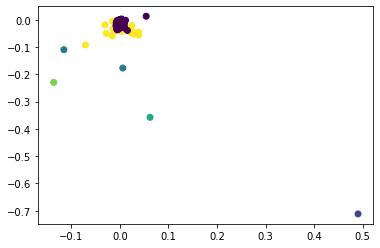

In [ ]:
chehre2=np.array(chehre2)
kmeans = KMeans(n_clusters=6, random_state=0).fit(chehre2)
y_kmeans = kmeans.predict(chehre2)
labels=kmeans.labels_
plt.scatter(chehre2[:, 0], chehre2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3","معنی4","معنی5","معنی6"])
counter=0
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":chehre[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":chehre[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":chehre[i]}, ignore_index=True)
  elif labels[i]==3:
    df=df.append({"معنی4":chehre[i]}, ignore_index=True)
  elif labels[i]==4:
    df=df.append({"معنی5":chehre[i]}, ignore_index=True)
  elif labels[i]==5:
    df=df.append({"معنی6":chehre[i]}, ignore_index=True)
    counter+=1

df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2,معنی3,معنی4,معنی5,معنی6
0,چهره به چهره (۱۳۷۷),«مقام فرخی در غزلسرایی [را باید] دریابند. نه ت...,حالت چهره و لحن صدا (facial expression and ton...,البته صلح با اسرائیل هم ضربه مهلکی بر چهره پان...,صدام حسین با برجستهسازی چهره عربی اسلام، مثل ت...,-رنگ لباس و چهره از قراردادهای مهم اجرای نمایش...
1,== چهره های شاخص ==,,از طریق کتیبههای اختصاصی معلوم شدهاست که نام ا...,,,ارتباطات غیر کلامی فرایند رساندن معنا را در صو...
2,پرچم تگزاس تاکنون ۶ بار تغییر چهره دادهاست: پر...,,,,,انواع دیگر است. در ارتباطات چهره به چهره زبان ...
3,امپراتوری شکل گرفته بود. با ظهور چهره قدرتمندی...,,,,,در سده هجدهم سایاتنووا ادبیات عاشقی ارمنی را د...
4,در سالهای اخیر، تصمیمهای بیفکرانه رونالدینیو و...,,,,,۱۳۵۶ - اجرای زندهٔ آلبوم چهره به چهره در حافظی...
...,...,...,...,...,...,...
171,۱۷ و چون روزه میگیرید چون ریاکاران کشیدهرو نبا...,,,,,
172,۱۹۹۵: غمی در چهره (Blue in the Face),,,,,
173,۲۵ دی ۱۳۵۵ - ماه چهره خلیلی بازیگر,,,,,
174,== چهره و عصای او ==,,,,,


In [ ]:
counter

19

In [ ]:
list1 = df['معنی1'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(6)]
print(most_common_words)

[('چهره', 'N_SING'), ('سال', 'N_SING'), ('ماندگار', 'ADJ'), ('عنوان', 'N_SING'), ('ایران', 'N_SING'), ('دانشگاه', 'N_SING')]


In [ ]:
list1 = df['معنی2'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

[('«مقام', 'N_SING'), ('فرخی', 'N_SING'), ('غزلسرایی', 'N_SING'), ('[را', 'ADJ'), ('باید]', 'V_SUB'), ('دریابند.', 'DELM'), ('مرگ', 'N_SING')]


In [ ]:
list1 = df['معنی3'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(20)]
print(most_common_words)

[('CIMRM', 'FW'), ('چهره', 'N_SING'), ('معلوم', 'ADJ'), ('حالت', 'N_SING'), ('لحن', 'N_SING'), ('صدا', 'N_SING'), ('(facial', 'DELM'), ('expression', 'FW'), ('and', 'FW'), ('tone', 'FW'), ('of', 'FW'), ('voice)', '.'), ('طریق', 'N_SING'), ('کتیبههای', 'N_PL'), ('اختصاصی', 'ADJ'), ('شدهاست', 'V_PA'), ('نام', 'N_SING'), ('پیکره', 'N_SING'), ('Arimanius،', 'N_SING'), ('شکل', 'N_SING')]


In [ ]:
list1 = df['معنی4'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(8)]
print(most_common_words)

[('صلح', 'N_SING'), ('اسرائیل', 'N_SING'), ('ضربه', 'N_SING'), ('مهلکی', 'ADJ'), ('چهره', 'N_SING'), ('پان', 'N_SING'), ('عربیستها', 'N_PL'), ('انظار', 'N_SING')]


In [ ]:
list1 = df['معنی5'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(6)]
print(most_common_words)

[('عربی', 'ADJ'), ('تأکید', 'N_SING'), ('ایران', 'N_SING'), ('جنگ', 'N_SING'), ('صدام', 'N_SING'), ('حسین', 'N_SING')]


In [ ]:
list1 = df['معنی6'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

[('چهره', 'N_SING'), ('زنان', 'N_PL'), ('بدن', 'N_SING'), ('نام', 'N_SING'), ('است.', '.'), ('است.', 'N_SING'), ('سال', 'N_SING')]


176

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt chehre1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt chehre1.txt
ctx_00 w1  12016-n/0.640261 14291-n/0.291114 11310-n/0.0412843 12908-n/0.0176834 11175-n/0.00647241 11174-n/0.00318451 !! چهره


1

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt chehre2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt chehre2.txt
ctx_00 w6  14291-n/0.644102 12016-n/0.270632 11310-n/0.0474058 12908-n/0.0249737 11175-n/0.00848868 11174-n/0.00439841 !! چهره


2

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt chehre3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt chehre3.txt
ctx_00 w1  11310-n/0.346917 12016-n/0.298667 12908-n/0.153386 14291-n/0.137747 11175-n/0.0474471 11174-n/0.015835 !! چهره


1

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt chehre4.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt chehre4.txt
ctx_00 w5  11310-n/0.761589 12016-n/0.0733299 12908-n/0.0538969 14291-n/0.042084 11175-n/0.0372182 11174-n/0.0318814 !! چهره


1

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt chehre5.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt chehre5.txt
ctx_00 w6  12016-n/0.809212 11310-n/0.0912399 14291-n/0.0453876 11174-n/0.028936 12908-n/0.0155519 11175-n/0.00967269 !! چهره


19

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt chehre6.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt chehre6.txt
ctx_00 w1  12016-n/0.662967 14291-n/0.253209 11310-n/0.0680118 12908-n/0.0095243 11175-n/0.00385396 11174-n/0.00243449 !! چهره


# اخبار

In [ ]:
#num4
akhbar= []
for i in wikitext:
  if " اخبار " in i:
    if(len(i)<350):
       i=i.replace("\u200c","")
       akhbar.append(i.rstrip("\n"))

#akhbar=akhbar[:200]


In [ ]:
akhbar2=[]
c=0
sum=0
for i in akhbar:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    akhbar2.append(np.array(sum))

    

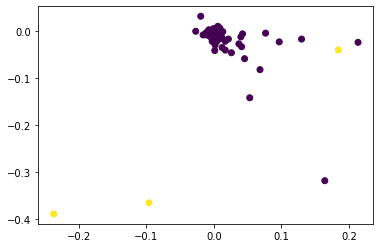

In [ ]:
akhbar2=np.array(akhbar2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(akhbar2)
y_kmeans = kmeans.predict(akhbar2)
labels=kmeans.labels_
plt.scatter(akhbar2[:, 0], akhbar2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":akhbar[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":akhbar[i]}, ignore_index=True)
    
df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2
0,غیاثالدین بن همامالدین خواندمیر، تاریخ حبیب ال...,پایگاه اخبار روزانه استان مرکزی ( مرکزی دیلی )
1,منابع اولیه دیگر شامل ابن بلخی، ابوبکر محمد بن...,خبرخوان جامع اخبار استان مرکزی - www.MarkaziRS...
2,قبل از ظهور تلویزیون، برنامههای رادیویی فقط شا...,در خمین رسانههای متعددی در حال فعالیتاند. تنها...
3,پایگاه اطلاعرسانی قشم آن لاین - اخبار بندر عبا...,
4,در سایت حقوق: اخبار حقوق اساسی,
...,...,...
192,از دی ماه ۱۳۹۳ تاکنون نیز یوسف اکبری که از سال...,
193,اداره اخبار ورزشی ایسنا در سال ۱۳۹۴ در همایش ب...,
194,اداره اخبار ورزشی ایسنا دارای ۲ سردبیر در بخشه...,
195,خبرگزاری بینالمللی روسیه «ریا نووستی» یک خبرگ...,


In [ ]:
list1 = df['معنی1'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

[('اخبار', 'N_PL'), ('ایران', 'N_SING'), ('سال', 'N_SING'), ('-', 'DELM'), ('منتشر', 'ADJ'), ('خبری', 'ADJ'), ('خبرگزاری', 'N_SING')]


In [ ]:
list1 = df['معنی2'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

[('اخبار', 'N_PL'), ('شهر', 'N_SING'), ('استان', 'N_SING'), ('مرکزی', 'ADJ'), ('نام', 'N_SING'), ('پایگاه', 'N_SING'), ('روزانه', 'ADJ')]


197

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt akhbar1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt akhbar1.txt
ctx_00 w1  11465-n/0.544515 11470-n/0.455485 !! اخبار


3

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt akhbar2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt akhbar2.txt
ctx_00 w1  11465-n/0.689657 11470-n/0.310343 !! اخبار


# مسابقه

In [ ]:
#num5
mosabeghe= []
for i in wikitext:
  if " مسابقه " in i:
    i=i.replace("\u200c","")
    mosabeghe.append(i.rstrip("\n"))

#mosabeghe=mosabeghe[:200]

In [ ]:
mosabeghe2=[]
c=0
sum=0
for i in mosabeghe:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    mosabeghe2.append(np.array(sum))

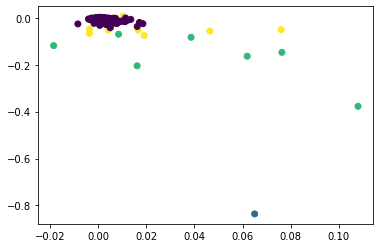

In [ ]:
mosabeghe2=np.array(mosabeghe2)
kmeans = KMeans(n_clusters=4, random_state=0).fit(mosabeghe2)
y_kmeans = kmeans.predict(mosabeghe2)
labels=kmeans.labels_
plt.scatter(mosabeghe2[:, 0], mosabeghe2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3","معنی4"])
c4=0
c3=0
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":mosabeghe[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":mosabeghe[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":mosabeghe[i]}, ignore_index=True)
    c3+=1
  elif labels[i]==3:
    df=df.append({"معنی4":mosabeghe[i]}, ignore_index=True)
    c4+=1
    
df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2,معنی3,معنی4
0,ابن سینا در همان محل مرگ، یعنی همدان به خاک سپ...,در سال ۱۹۳۹ گروهی از فیزیکدانهای مجارستانی از ...,در جریان تدارک جشنهای ۲۵۰۰ سالهٔ شاهنشاهی ایرا...,مسابقات در ابتدا تنها شامل مسابقه «دوندگی» بود...
1,کاسانو پس از کریستین پانوچی، هم تیمی سابقش در ...,,ورزش از نظر لغوی اسم مصدر است. به معنای «ورزید...,ایران بعد از انقلاب اسلامی، همواره مسابقات خود...
2,مسابقات دوندگی در ونکوور شامل ونکوور سان ران(V...,,تحریک و تحرک بخشیدن به ورزشها اغلب یک حالت و و...,یکی از مهمترین مشکلات پیش روی المپیک «و بهطور ...
3,ونکوور همچنین میزبان مسابقات دوچرخهسواریِ مهم...,,در دوران باستان تنها مردان یونانی که آزاد «و ن...,مطابق ماده ۴۸٫۱ منشور المپیک، هر دوره مسابقات ...
4,مسابقه آواز یورویژن در سال ۲۰۱۲ (به انگلیسی: E...,,سیاست نیز در چند مورد در بازیهای المپیک اختلال...,روسیه، نروژ، کانادا، دانمارک و آمریکا که سواحل...
...,...,...,...,...
179,ریگان در دوره ریاست جمهوری خود ابتکارات نوین س...,,,
180,پرونده:Greyhound Racing 2 amk.jpg|یک سگ در مسا...,,,
181,از جمله رکوردهای او مبارزهٔ همزمان با ۵۵ نفر د...,,,
182,وازاآری (技あり) یا آنگونه که در خارج از ژاپن روا...,,,


In [ ]:
list1 = df['معنی1'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

[('مسابقه', 'N_SING'), ('تیم', 'N_SING'), ('ایران', 'N_SING'), ('بازی', 'N_SING'), ('ملی', 'ADJ'), ('سال', 'N_SING'), ('دایی', 'N_SING')]


In [ ]:
list1 = df['معنی2'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

[('آمریکا', 'N_SING'), ('ساخت', 'N_SING'), ('بمب', 'N_SING'), ('اتمی', 'ADJ'), ('هشدار', 'N_SING'), ('توجه', 'N_SING'), ('زیلارد', 'N_SING')]


In [ ]:
list1 = df['معنی3'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

[('اهدا', 'N_SING'), ('المپیک', 'N_SING'), ('مدال', 'N_SING'), ('سال', 'N_SING'), ('مسابقه', 'N_SING'), ('مسابقات', 'N_PL'), ('ورزش', 'N_SING')]


In [ ]:
list1 = df['معنی4'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

[('المپیک', 'N_SING'), ('مسابقه', 'N_SING'), ('شجریان', 'N_SING'), ('سال', 'N_SING'), ('محمدرضا', 'N_SING'), ('مسابقات', 'N_PL'), ('قرآن', 'N_SING')]


184

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt mosabeghe1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt mosabeghe1.txt
ctx_00 w1  10538-n/0.877806 11623-n/0.0864305 10535-n/0.0344679 44417-n/0.00129585 !! مسابقه


1

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt mosabeghe2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt mosabeghe2.txt
ctx_00 w6  11623-n/0.549406 10538-n/0.297027 10535-n/0.146671 44417-n/0.00689563 !! مسابقه


7

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt mosabeghe3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt mosabeghe3.txt
ctx_00 w5  10535-n/0.490207 10538-n/0.38054 11623-n/0.111448 44417-n/0.0178052 !! مسابقه


8

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt mosabeghe4.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt mosabeghe4.txt
ctx_00 w2  10538-n/0.77879 11623-n/0.132064 44417-n/0.0551055 10535-n/0.03404 !! مسابقه


# حوزه

In [ ]:
#num6
hoze= []
for i in wikitext:
  if " حوزه " in i:
    if(len(i)<250):
      i=i.replace("\u200c","")
      hoze.append(i.rstrip("\n"))

#hoze=hoze[:200]

In [ ]:
hoze2=[]
c=0
sum=0
for i in hoze:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    hoze2.append(np.array(sum))

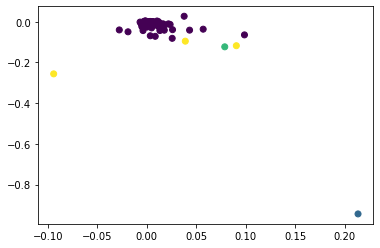

In [ ]:
hoze2=np.array(hoze2)
kmeans = KMeans(n_clusters=4, random_state=0).fit(hoze2)
y_kmeans = kmeans.predict(hoze2)
labels=kmeans.labels_
plt.scatter(hoze2[:, 0], hoze2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3","معنی4"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":hoze[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":hoze[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":hoze[i]}, ignore_index=True)
  elif labels[i]==3:
    df=df.append({"معنی4":hoze[i]}, ignore_index=True)
    
df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2,معنی3,معنی4
0,== پیشینه پژوهش در حوزه اسطورهشناسی ==,شیمی نظری، که به توصیف پدیدههای شیمیایی با است...,دولت تاجیکستان حدود ۹۰ درصد از نیازهای انرژی خ...,اگرچه آوازه استان مرکزی بیشتر به خاطر صنعت، کش...
1,== حوزه و قلمرو روانشناسی ==,,,چین و ازبکستان چند قرارداد به ارزش ۱۰ میلیارد ...
2,در واژهنامه تخصصی معماری واژه فضا در حوزه معما...,,,مَدْرَس واژهای عربی به معنای محل درس دادن است....
3,پایگاه اطلاعرسانی حوزه هنری استان بوشهر,,,
4,=== حوزه علمیه خواهران ===,,,
...,...,...,...,...
190,دولت کابل به ریاست حامد کرزی، در سال ۲۰۰۳ میلا...,,,
191,== شب چله در حوزه ایران بزرگ ==,,,
192,سید محمد حسین صدر طباطبایی (محقق در حوزه بازار...,,,
193,قاضیهای دادگاه استیناف حوزه دوم ایالات متحده آ...,,,


In [ ]:
list1 = df['معنی1'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

[('حوزه', 'N_SING'), ('علمیه', 'ADJ'), ('قم', 'N_SING'), ('کشورهای', 'N_PL'), ('==', 'DELM'), ('ایران', 'N_SING'), ('سال', 'N_SING')]


In [ ]:
list1 = df['معنی2'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

[('شیمی', 'N_SING'), ('نظری،', 'ADJ'), ('توصیف', 'N_SING'), ('پدیدههای', 'N_PL'), ('شیمیایی', 'ADJ'), ('استفاده', 'N_SING'), ('خواص', 'N_PL')]


In [ ]:
list1 = df['معنی3'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

[('تاجیکستان', 'N_SING'), ('دولت', 'N_SING'), ('۹۰', 'NUM'), ('درصد', 'N_SING'), ('نیازهای', 'N_PL'), ('انرژی', 'N_SING'), ('واردات', 'N_PL')]


In [ ]:
list1 = df['معنی4'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

[('حوزه', 'N_SING'), ('ازبکستان', 'N_SING'), ('محل', 'N_SING'), ('درس', 'N_SING'), ('اگرچه', 'CON'), ('آوازه', 'N_SING'), ('استان', 'N_SING')]


195

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt hoze1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt hoze1.txt
ctx_00 w1  14259-n/0.877572 12382-n/0.0756985 12507-n/0.0409339 11406-n/0.00579513 !! حوزه


1

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt hoze2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt hoze2.txt
ctx_00 w6  12507-n/0.631345 12382-n/0.188913 14259-n/0.125438 11406-n/0.0543045 !! حوزه


1

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt hoze3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt hoze3.txt
ctx_00 w6  12507-n/0.427515 14259-n/0.352871 12382-n/0.189437 11406-n/0.0301765 !! حوزه


3

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt hoze4.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt hoze4.txt
ctx_00 w1  14259-n/0.464091 12507-n/0.284671 12382-n/0.159037 11406-n/0.0921999 !! حوزه


# ماشین

In [ ]:
#num7
mashin= []
for i in wikitext:
  if " ماشین " in i:
    if(len(i)<350):
      i=i.replace("\u200c","")
      mashin.append(i.rstrip("\n"))

#mashin=mashin[:200]

In [ ]:
mashin2=[]
c=0
sum=0
for i in mashin:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    mashin2.append(np.array(sum))

In [ ]:
mashin2=np.array(mashin2)

In [ ]:
mashin2

array([[ 1.7467928e-01, -2.2306949e-01, -2.1255392e-01, ...,
        -3.6881950e-01,  3.2432762e-01, -9.0335846e-02],
       [ 1.0297144e-01,  9.0363942e-02, -7.0625424e-02, ...,
         2.8568417e-02,  4.3551773e-02, -1.9562060e-01],
       [ 3.1055561e-01, -3.2616583e-01, -1.4788678e-01, ...,
         8.5080497e-02,  3.9089334e-01, -2.2732999e-02],
       ...,
       [-9.0068998e-04, -1.9361130e-03, -5.7650520e-03, ...,
         2.8621824e-03, -9.8966404e-05,  2.1432869e-03],
       [-3.4205019e-04, -2.0024179e-04,  2.3006508e-04, ...,
        -9.3347277e-05,  2.7487322e-04, -6.8894803e-04],
       [ 2.9750173e-03, -5.8028786e-03, -3.2273622e-03, ...,
         1.9723429e-04,  1.2416560e-03, -8.9032727e-04]], dtype=float32)

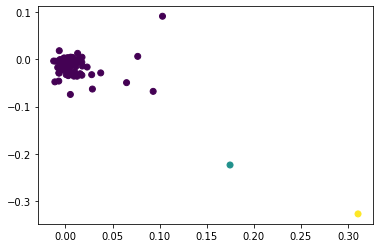

In [ ]:

kmeans = KMeans(n_clusters=3, random_state=0).fit(mashin2)
y_kmeans = kmeans.predict(mashin2)
labels=kmeans.labels_
plt.scatter(mashin2[:, 0], mashin2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":mashin[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":mashin[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":mashin[i]}, ignore_index=True)


df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')

df

,معنی1,معنی2,معنی3
0,مجموعه‌داران ماشین اهل بریتانیا,کتاب گلستان یکی از نخستین کتاب‌های فارسی است ک...,اینشتین در آنجا مشغول بررسی درخواست‌های ثبت اخ...
1,در دوران ناصرالدین‌شاه قاجار محله‌هایی از جمله...,,
2,معادن بوکسیت بسیار غنی در این کشور، شناسایی شد...,,
3,مهمترین صادرات بلغارستان اسانس گل رز است، همچن...,,
4,مهندسی مکانیک آن شاخهُ مهندسی است که شامل طراح...,,
...,...,...,...
193,برای رسیدن به قونیه از آنکارا با ماشین می بایس...,,
194,دستگاه تراش ماشین ابزاری است، که برای تراشیدن ...,,
195,به دلیل تولید اقتصادی با دقت بالا و کیفیت دستگ...,,
196,== تاریخچه ماشین تراش ==,,


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt mashin1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt mashin1.txt
ctx_00 w1  10885-n/0.749346 12820-n/0.232667 12821-n/0.017987 !! ماشین


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt mashin2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt mashin2.txt
ctx_00 w6  10885-n/0.813395 12820-n/0.163578 12821-n/0.0230275 !! ماشین


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt mashin3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt mashin3.txt
ctx_00 w6  10885-n/0.930837 12820-n/0.0603188 12821-n/0.00884391 !! ماشین


# چشم

In [ ]:
#num8
cheshm= []
for i in wikitext:
  if " چشم " in i:
    if(len(i)<350):
      i=i.replace("\u200c","")
      cheshm.append(i.rstrip("\n"))

#cheshm=cheshm[:200]


In [ ]:
cheshm2=[]
c=0
sum=0
for i in cheshm:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    cheshm2.append(np.array(sum))

In [ ]:
cheshm2=np.array(cheshm2)

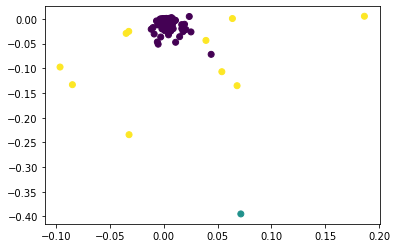

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(cheshm2)
y_kmeans = kmeans.predict(cheshm2)
labels=kmeans.labels_
plt.scatter(cheshm2[:, 0], cheshm2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":cheshm[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":cheshm[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":cheshm[i]}, ignore_index=True)

In [ ]:
df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')

In [ ]:
df

,معنی1,معنی2,معنی3
0,جنگل‌های طبیعی: در نقاط مختلف استان این‌گونه ج...,با گسترش روزافزون علم و ساخت تلسکوپ‌های دقیق، ...,محمد دبیر سیاقی. رودکی… آن تیره چشم شاعر روشن ...
1,با فلوئور و HF باید با دقت زیادی رفتار شود و ا...,,ابومعین ناصر بن خسرو بن حارث قبادیانی بلخی، مع...
2,در برخی موارد، آمفرا نیز در صحنه به چشم می‌خور...,,مردم ماوراءالنهر چشم امید به اسحاق، عموی نصر، ...
3,پل پنج چشم بناب,,بعداً و در هنگام لشکرکشی به آسیای میانه، توطئه...
4,اندازه‌گیرها در واقع چشم سیستم‌های کنترل محسوب...,,خدمات این افراد استفاده نمایند ابتدا آلمانی‌ها...
...,...,...,...
184,سربازان یک چشم در فیلمی به کارگردانی خودش,,
185,بر خلاف خود برهان نظم، نقد آن به گذشته‌های دور...,,
186,منظور هیوم از «انطباعات» داده‌های مستقیم حس و ...,,
187,آرگوس صد چشم ، در اسطوره‌های یونان، از قهرمانا...,,


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt cheshm1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt cheshm1.txt
ctx_00 w1  10314-n/0.958361 26671-n/0.0279234 14222-n/0.0137157 !! چشم


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt cheshm2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt cheshm2.txt
ctx_00 w6  10314-n/0.94047 26671-n/0.0310398 14222-n/0.0284901 !! چشم


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt cheshm3.txt

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt cheshm3.txt
ctx_00 w1  10314-n/0.918373 26671-n/0.057165 14222-n/0.0244621 !! چشم


In [ ]:
#num9
faza= []
for i in wikitext:
  if " فضا " in i:
    if(len(i)<350):
         i=i.replace("\u200c","")
         faza.append(i.rstrip("\n"))

#faza=faza[:200]


In [ ]:
faza2=[]
c=0
sum=0
for i in faza:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    faza2.append(sum)


In [ ]:
faza2=np.array(faza2)
kmeans = KMeans(n_clusters=7, random_state=0).fit(faza2)
y_kmeans = kmeans.predict(faza2)
labels=kmeans.labels_
plt.scatter(faza2[:, 0], faza2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

ValueError: ignored

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3","معنی4","معنی5","معنی6","معنی7"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":faza[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":faza[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":faza[i]}, ignore_index=True)
  elif labels[i]==3:
    df=df.append({"معنی4":faza[i]}, ignore_index=True)
  elif labels[i]==4:
    df=df.append({"معنی5":faza[i]}, ignore_index=True)
  elif labels[i]==5:
    df=df.append({"معنی6":faza[i]}, ignore_index=True)
  elif labels[i]==6:
    df=df.append({"معنی7":faza[i]}, ignore_index=True)

In [ ]:
df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2,معنی3,معنی4,معنی5,معنی6,معنی7
0,==== فضا ====,ریاضیات به مطالعهٔ مباحثی چون کمیت (نظریه اعدا...,برخی از نویسندگان، از جمله تالکین با هدف‌هایی ...,هنگامی که اولین اتم‌های تشکیل دهنده فضا شفاف ش...,قرار داشتن زمین در کهکشان راه‌شیری، به عنوان م...,=== فرایند ساخت عناصر در فضا ===,شیمی کیهانی: مطالعه مواد شیمیایی موجود در فضا ...
1,پیشرفت در تکنولوژی که حمل و نقل جمع زیادی را م...,,,,,== فلسفه فضا ==,بیشتر کارهای او در دفتر ثبت اختراعات مربوط به ...
2,آنری پوانکاره، یک ریاضیدان و فیزیکدان فرانسوی ...,,,,,در واژه‌نامه تخصصی معماری واژه فضا در حوزه معم...,تور مجازی عبارت است از ترکیبی از تصاویر، نماها...
3,تعریف فضا در فیزیک مورد اختلاف است. مفاهیم گون...,,,,,فضا قسمت‌های نسبتاً تهی کیهان است که بیرون از ...,در سده‌های ۱۹ام و ۲۰ام ریاضیدانان شروع به بررس...
4,در فیزیک کلاسیک، فضا، یک فضای اقلیدسی سه‌بعدی ...,,,,,در ریاضیات، فضا مجموعه‌ای است که معمولاً ساختا...,
...,...,...,...,...,...,...,...
170,,,,,,== سفر به فضا ==,
171,,,,,,انوشه، همیشه عاشق فضا و فضانوردی و در پی راه ی...,
172,,,,,,سازمان فضایی ایران، به عنوان متولی بخش فضا در ...,
173,,,,,,== فعالیت‌های انوشه انصاری پس از سفر به فضا ==,


In [ ]:
list1 = df['معنی7'].to_list()
new=[]
for s in range(len(list1)):
  #sents = parsivar_tokenizer.tokenize_words(s)
  text_tags = my_tagger.parse(my_tokenizer.tokenize_words(list1[s]))
  for i in text_tags:
    if i[0] not in stop_w_list:
      new.append(i)


from collections import Counter 
most_common_words= [word for word, word_count in Counter(new).most_common(7)]
print(most_common_words)

In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt faza1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt faza1.txt
ctx_00 w1  15058-n/0.263588 14953-n/0.246476 13285-n/0.215786 11104-n/0.149322 27670-n/0.0544723 10220-n/0.037575 27629-n/0.0327807 !! فضا


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt faza2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt faza2.txt
ctx_00 w6  14953-n/0.420429 13285-n/0.182166 15058-n/0.13498 27629-n/0.0804456 11104-n/0.0752897 27670-n/0.0681119 10220-n/0.0385773 !! فضا


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt faza3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt faza3.txt
ctx_00 w6  11104-n/0.412693 13285-n/0.181954 15058-n/0.140385 14953-n/0.115349 27670-n/0.097146 27629-n/0.0307905 10220-n/0.0216831 !! فضا


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt faza4.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt faza4.txt
ctx_00 w5  11104-n/0.358351 14953-n/0.210992 13285-n/0.205508 15058-n/0.110983 27670-n/0.0430619 27629-n/0.0421247 10220-n/0.0289795 !! فضا


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt faza5.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt faza5.txt
ctx_00 w6  14953-n/0.442528 15058-n/0.308644 11104-n/0.0711136 13285-n/0.0674397 27629-n/0.0578203 27670-n/0.031538 10220-n/0.0209172 !! فضا


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt faza6.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt faza6.txt
ctx_00 w1  14953-n/0.492202 15058-n/0.456323 27670-n/0.0422252 13285-n/0.00371319 27629-n/0.00306098 11104-n/0.00174104 10220-n/0.000734153 !! فضا


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt faza7.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt faza7.txt
ctx_00 w1  13285-n/0.307631 11104-n/0.271224 14953-n/0.180401 15058-n/0.115243 27670-n/0.08371 10220-n/0.0255268 27629-n/0.0162654 !! فضا


# موسسه

In [ ]:
#num10
moassese= []
for i in wikitext:
  if " موسسه " in i:
    if(len(i)<350):
      i=i.replace("\u200c","")
      moassese.append(i.rstrip("\n"))

#moassese=moassese[:200]

In [ ]:
moassese2=[]
c=0
sum=0
for i in moassese:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    moassese2.append(np.array(sum))

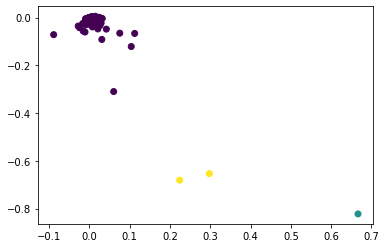

In [ ]:
moassese2=np.array(moassese2)
kmeans = KMeans(n_clusters=3, random_state=0).fit(moassese2)
y_kmeans = kmeans.predict(moassese2)
labels=kmeans.labels_
plt.scatter(moassese2[:, 0], moassese2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":moassese[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":moassese[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":moassese[i]}, ignore_index=True)

df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df


,معنی1,معنی2,معنی3
0,در پی اعتراضات سال‌های ۲۰۱۹ و ۲۰۲۰ در عراق، مع...,نشریه موسسه پژوهشگران جوان نانو,----بهترین دانشگاه‌های ترکیه در سال 2020 بر اس...
1,انستیتوی بین المللی فناوری اطلاعات (IIITH) یک ...,,فرهنگستان پادشاهی علوم سوئد، اهداء جایزه نوبل ...
2,مورگان شوستر موسسه مطالعات و پژوهشهای سیاسی,,
3,پیش از این وی معاون فرهنگی وزارت ارشاد و نیز م...,,
4,عضو هیئت امنای دانشگاههای علم و صنعت، صنعتی اص...,,
...,...,...,...
192,خانم سوئیسی، وی سی دی فیلم تیتراژ و شرح پشت جل...,,
193,ما را ببخشید، وی سی دی فیلم تیتراژ و شرح پشت ج...,,
194,==گمانه ها درباره شیوع کرونا از موسسه دولتی وی...,,
195,بانک جهانی یک موسسه مالی بین‌المللی است که به ...,,


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt moasese1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt moasese1.txt
ctx_00 w1  12975-n/0 !! موسسه


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt moasese2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt moasese2.txt
ctx_00 w2  12975-n/0 !! موسسه


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt moasese3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt moasese3.txt
ctx_00 w4  12975-n/0 !! موسسه


# نمایشگاه

In [ ]:
#num11
namayeshgah= []
for i in wikitext:
  if " نمایشگاه " in i:
    if(len(i)<350):
         i=i.replace("\u200c","")
         namayeshgah.append(i.rstrip("\n"))

#namayeshgah=namayeshgah[:200]

In [ ]:
namayeshgah2=[]
c=0
sum=0
for i in namayeshgah:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    namayeshgah2.append(np.array(sum))

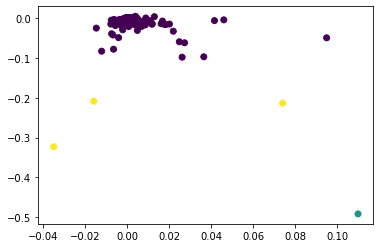

In [ ]:
namayeshgah2=np.array(namayeshgah2)
kmeans = KMeans(n_clusters=3, random_state=0).fit(namayeshgah2)
y_kmeans = kmeans.predict(namayeshgah2)
labels=kmeans.labels_
plt.scatter(namayeshgah2[:, 0], namayeshgah2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":namayeshgah[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":namayeshgah[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":namayeshgah[i]}, ignore_index=True)
    
df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2,معنی3
0,اولین نمایشگاه هنری بین‌المللی تهران (دی ۱۳۵۳)؛,سفر به آمریکا و اقامت در لانگ آیلند (۱۳۴۹ و شر...,از جمله نمایشگاه‌های نقاشی که سهراب سپهری در آ...
1,دریاچه شورابیل(دریاچه شورابیل در حریم شهری ارد...,,محمدرضا شجریان مبدع چند ساز جدید در موسیقی ایر...
2,نمایشگاه بین‌المللی کاسپین زنجان از مکان‌های د...,,دریاچه شورابیل در حریم شهری اردبیل قرار دارد و...
3,=== نمایشگاه بین‌المللی ===,,
4,هر سال نمایشگاه‌های تخصصی خوشنویسی در این شهر ...,,
...,...,...,...
191,کسب رتبه برتر در ششمین نمایشگاه دستاوردهای پژو...,,
192,رتبه اول تألیف کتاب دانشگاهی در هجدهمین نمایشگ...,,
193,اثر برگزیده بیستمین نمایشگاه بین‌المللی قرآن ک...,,
194,رتبه برتر نشریات قرآنی در شانزدهمین نمایشگاه ب...,,


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt namayeshga1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt namayeshga1.txt
ctx_00 w1  10391-n/0.629201 14048-n/0.240474 11805-n/0.130325 !! نمایشگاه


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt namayeshga2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt namayeshga2.txt
ctx_00 w6  10391-n/0.431753 14048-n/0.366215 11805-n/0.202031 !! نمایشگاه


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt namayeshga3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt namayeshga3.txt
ctx_00 w1  11805-n/0.808261 10391-n/0.16001 14048-n/0.0317291 !! نمایشگاه


# نقاشی

In [ ]:
#num12
naghashi= []
for i in wikitext:
  if " نقاشی " in i:
    if(len(i)<350):
         i=i.replace("\u200c","")
         naghashi.append(i.rstrip("\n"))

#naghashi=naghashi[:200]

In [ ]:
naghashi2=[]
c=0
sum=0
for i in naghashi:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    naghashi2.append(np.array(sum))

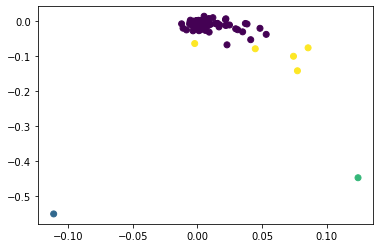

In [ ]:
naghashi2=np.array(naghashi2)
kmeans = KMeans(n_clusters=4, random_state=0).fit(naghashi2)
y_kmeans = kmeans.predict(naghashi2)
labels=kmeans.labels_
plt.scatter(naghashi2[:, 0], naghashi2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3","معنی4"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":naghashi[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":naghashi[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":naghashi[i]}, ignore_index=True)
  elif labels[i]==3:
    df=df.append({"معنی4":naghashi[i]}, ignore_index=True)
    
df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2,معنی3,معنی4
0,جاده کمربندی (درنیشه) که نمای پاوه را همچون بو...,در طی جستجوهای باستان‌شناسان برای یافتن تمدن، ...,گنبد سنت جرج، قدیمی‌ترین بنای صوفیه است. سه لا...,دی کرومات پتاسیم عامل اکسیدکننده بسیار قوی است...
1,== تکنیک‌های نقاشی ==,,,پرده خوانی:به نمایشی گفته می‌شود که در آن تصاو...
2,برخی از تکنیک‌های نقاشی عبارتند از:,,,سردرهای ورودی به غارهای فرسایش دیدهٔ دریایی شب...
3,نقاشی یا رنگ مومی، نقاشی یا رنگی که با موم آب‌...,,,نقاشی، نگارگری یا رسم، فرایندی است که طی آن رن...
4,سایش و نقاشی نقطه‌ای,,,قدیمی‌ترین نقاشی‌ها در جهان که متعلق به حدود ۳...
...,...,...,...,...
188,ون گوگ در ابتدا تحت تأثیر نقاشی‌های هلندی از ر...,,,
189,ون گوگ شیفته نقاشی از کافه‌های شبانه، مردم طبق...,,,
190,در سال ۱۹۶۵ یک کشاورز، تفنگی را که ون گوگ با آ...,,,
191,فیلمی با نام دوستدار تو، ونسان که در سال ۲۰۱۷ ...,,,


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt naghashi1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt naghashi1.txt
ctx_00 w1  14547-n/0.634593 11069-n/0.241393 14548-n/0.067608 10568-n/0.056406 !! نقاشی


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt naghashi2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt naghashi2.txt
ctx_00 w6  14547-n/0.679638 10568-n/0.148142 11069-n/0.0940918 14548-n/0.0781285 !! نقاشی


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt naghashi3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt naghashi3.txt
ctx_00 w6  10568-n/0.600435 11069-n/0.216841 14547-n/0.138073 14548-n/0.0446513 !! نقاشی


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt naghashi4.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt naghashi4.txt
ctx_00 w1  11069-n/0.764183 14547-n/0.160076 10568-n/0.039794 14548-n/0.0359472 !! نقاشی


# دروازه

In [ ]:
#num13
darvaze= []
for i in wikitext:
  if " دروازه " in i:
    if(len(i)<350):
         i=i.replace("\u200c","")
         darvaze.append(i.rstrip("\n"))

#darvaze=darvaze[:200]

In [ ]:
darvaze2=[]
c=0
sum=0
for i in darvaze:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    darvaze2.append(np.array(sum))

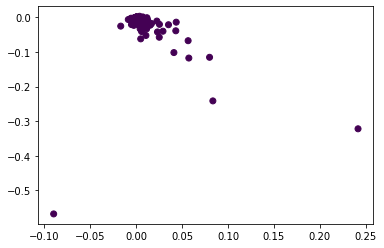

In [ ]:
darvaze2=np.array(darvaze2)
kmeans = KMeans(n_clusters=1, random_state=0).fit(darvaze2)
y_kmeans = kmeans.predict(darvaze2)
labels=kmeans.labels_
plt.scatter(darvaze2[:, 0], darvaze2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":darvaze[i]}, ignore_index=True)

    
df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1
0,اعضای شبکه اینترنت یا شرکت‌های سرویس دهنده آن‌...
1,این مزار عصر شاهرخ شاه تیموری، به همت همسرش گو...
2,شهر صد دروازه در ناحیه سمنان و دامغان امروزی د...
3,پرونده:Ihstar Gate RB.JPG|ورودی موزه‌ای در بغد...
4,در بازی فوتبال به کسی که برای نگهداری و محافظت...
...,...
195,شهر کشکسرای در 15 کیلومتری شهرستان مرند ، نه ی...
196,برات‌آباد، فردوس، ویره، رامین، دروازه عباس‌آبا...
197,مورخ یمنی «شرف الدین» می‌گوید که شهر عمران در ...
198,سده شهری است در استان فارس و در جنوب ایران است...


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt darvaze.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt darvaze.txt
ctx_00 w1  15007-n/0 !! دروازه


# حرکت

In [ ]:
#num14
harekat= []
for i in wikitext:
  if " حرکت " in i:
    if(len(i)<350):
         harekat.append(i.rstrip("\n"))

#harekat=harekat[:200]

In [ ]:
harekat2=[]
c=0
sum=0
for i in harekat:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    harekat2.append(np.array(sum))

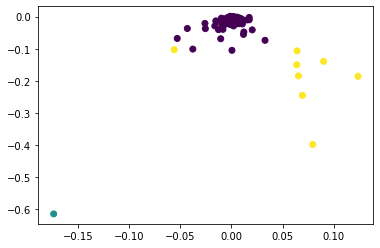

In [ ]:
harekat2=np.array(harekat2)
kmeans = KMeans(n_clusters=3, random_state=0).fit(harekat2)
y_kmeans = kmeans.predict(harekat2)
labels=kmeans.labels_
plt.scatter(harekat2[:, 0], harekat2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":harekat[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":harekat[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":harekat[i]}, ignore_index=True)
    
df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2,معنی3
0,علاوه‌بر این، او در ۲۶ سالگی و در سال ۱۹۰۵ که ...,این اصطلاح به حرکت فرهنگی دانش آزاد اشاره دارد...,=== قوانین نیوتن در حرکت اجسام ===
1,هاوکینگ دچار بیماری اسکلروز جانبی آمیوتروفیک ب...,,در بخش دیگری از پرینسیپیا، نیوتن چگونگی حرکت ا...
2,CarSim (نرم‌افزار شبیه‌سازی و تحلیل دینامیکی ح...,,قانون اول نیوتن (قانون لَختی): هر جسم در سکون ...
3,ADVISOR (نرم‌افزار شبیه‌سازی و تحلیل دینامیکی ...,,مجموعهٔ قوانین سه‌گانهٔ حرکت و قانون گرانش عمو...
4,در عوض اورشلیم به نشانهٔ تسلیم دروازه‌هایش را ...,,درگیری دیگری نیوتون با رابرت هوک بر سر کشف قوا...
...,...,...,...
186,همرفت: وقتی مایعی را از زیر شروع به گرم کردن م...,,
187,جیمز کلرک ماکسول یکی از دانشمندانی بود که در ک...,,
188,ماهواره‌ای که در مدار ژئوسنکرون و در بالای خط ...,,
189,عناصر مداری؛ عناصری ششگانه‌اند و به تقلید از ی...,,


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt harekat1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt harekat1.txt
ctx_00 w1  15937-n/0.705388 12423-n/0.267098 14017-n/0.0275137 !! حرکت


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt harekat2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt harekat2.txt
ctx_00 w5  15937-n/0.387684 12423-n/0.350867 14017-n/0.26145 !! حرکت


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt harekat3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt harekat3.txt
ctx_00 w1  12423-n/0.5006 15937-n/0.467227 14017-n/0.0321727 !! حرکت


# داور

In [ ]:
#num15
davar= []
for i in wikitext:
  if " داور " in i:
    if(len(i)<350):
         i=i.replace("\u200c","")
         davar.append(i.rstrip("\n"))

#davar=davar[:200]

In [ ]:
davar2=[]
c=0
sum=0
for i in davar:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    davar2.append(np.array(sum))

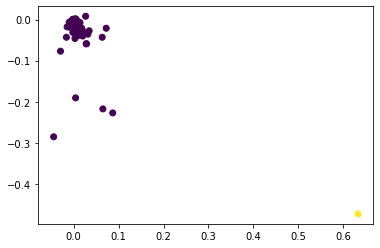

In [ ]:
davar2=np.array(davar2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(davar2)
y_kmeans = kmeans.predict(davar2)
labels=kmeans.labels_
plt.scatter(davar2[:, 0], davar2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":davar[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":davar[i]}, ignore_index=True)

    
df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2
0,زمانیکه یک تیم توپ را در زمین خودی تحت کنترل م...,در جام جهانی ۲۰۰۲ توتی آن قدرها هم خوش شانس نب...
1,در طی بازی بازیکنان حق گرفتن یکدیگر یا هل دادن...,
2,اگر توپ دست یکی از تیم‌ها باشد و در هنگام حرکت...,
3,بریرانی از سال ۱۳۶۰ در دانشگاه‌های تهران گرافی...,
4,با برگزاری مسابقات لیگ برتر، در یک بازی مانده ...,
...,...,...
194,در کنفرانس‌های لاهه ۱۸۹۹ و ۱۹۰۷ میلادی داوری ب...,
195,حضور در خندوانه (ویژه نوروز ۹۸) به عنوان داور ...,
196,شرط داوری ممکن است خاص یا عام باشد. شرط داوری ...,
197,مهدی ربی طی این سال‌ها داور جوایز ادبی متعددی ...,


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt davar1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt davar1.txt
ctx_00 w1  27722-n/0.586907 11959-n/0.413093 !! داور


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt davar2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt davar2.txt
ctx_00 w3  27722-n/0.759725 11959-n/0.240275 !! داور


# بازی

In [ ]:
#num 16
bazi= []
for i in wikitext:
  if " بازی " in i:
    if(len(i)<350):
         i=i.replace("\u200c","")
         bazi.append(i.rstrip("\n"))

#bazi=bazi[:200]

In [ ]:
bazi2=[]
c=0
sum=0
for i in bazi:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    bazi2.append(np.array(sum))

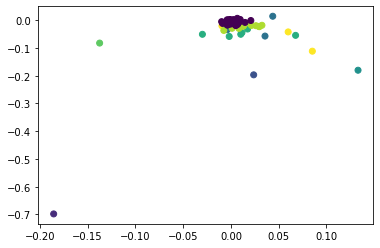

In [ ]:
bazi2=np.array(bazi2)
kmeans = KMeans(n_clusters=9, random_state=0).fit(bazi2)
y_kmeans = kmeans.predict(bazi2)
labels=kmeans.labels_
plt.scatter(bazi2[:, 0], bazi2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3","معنی4","معنی5","معنی6","معنی7","معنی8","معنی9"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":bazi[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":bazi[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":bazi[i]}, ignore_index=True)
  elif labels[i]==3:
    df=df.append({"معنی4":bazi[i]}, ignore_index=True)
  elif labels[i]==4:
    df=df.append({"معنی5":bazi[i]}, ignore_index=True)
  elif labels[i]==5:
    df=df.append({"معنی6":bazi[i]}, ignore_index=True)
  elif labels[i]==6:
    df=df.append({"معنی7":bazi[i]}, ignore_index=True)
  elif labels[i]==7:
    df=df.append({"معنی8":bazi[i]}, ignore_index=True)
  elif labels[i]==8:
    df=df.append({"معنی9":bazi[i]}, ignore_index=True)

df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2,معنی3,معنی4,معنی5,معنی6,معنی7,معنی8,معنی9
0,Heleile.JPG|پارک بازی کودکان هلیله,او چند روز به این فکر کرد اما پاسخی نیافت. درس...,ج - شبیه‌سازی ساختاری (جایی که افراد شبیه‌سازی...,د - شبیه‌سازی ایفای نقش (جایی که افراد واقعی ن...,فوتبال ورزش نخست تهران است و شهرآورد تهران میا...,رقص یک وام‌واژه از زبان عربی است که ریشه در زب...,برای پالایش گاز هیدروژن از بخار آب زیادی که در...,شناخت حیوانات بازی کرده‌است. ارتباطات حیوانات،...,نهضت المپیک همچنین متهم به حفاظت بیش از حد از ...
1,هنر نقاشی با شن: بازی تخیل در نقش‌ها,,,در زمان طاهریان شکار، شطرنج و چوگان ورزش مورد ...,,تئاتر شاخه‌ای از هنرهای نمایشی است که به بازنم...,,این استان در فوتبال پیشرفته است و تیم‌هایی همچ...,آتش المپیک در جایگاه مخصوص المپیک روشن می‌شود ...
2,=== بازی ===,,,اما اغلب فشار برای رقابت یا یک تمایل فردی برای...,,بدلکاری شامل کارهایی مانند پریدن از دیوار، هوا...,,بزرگ‌ترین و وسیع‌ترین زمین بازی کریکت جهان سال...,برخی رایانه‌ها نیز برای انجام رمزگشایی بکار گر...
3,== ماهیت بازی ==,,,,,یک بازی شامل مجموعه‌ای از بازیکنان، مجموعه‌ای ...,,طبق تعریف جین مک گانیگال از بازی، هر بازی دارا...,
4,== بازی در ایران باستان ==,,,,,"چلیپاسنگ یا خاچکار (به ارمنی: ""Խաչքար"") نام سن...",,بازخورد مشخصه ای از یک بازی است که بازیکنان می...,
...,...,...,...,...,...,...,...,...,...
149,کاربرد نظریه بازی در علم سیاست در مسائلی مانند...,,,,,,,,
150,=== بازی ===,,,,,,,,
151,هرگاه سود یک موجودیت تنها در گرو رفتار خود او ...,,,,,,,,
152,استراتژی مهارت خوب بازی کردن یا محاسبهٔ به‌کار...,,,,,,,,


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazi1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazi1.txt
ctx_00 w1  10558-n/0.43747 12889-n/0.371098 13574-n/0.0611998 12686-n/0.0568355 10537-n/0.0375508 10547-n/0.0129969 12974-n/0.0109205 13575-n/0.0070781 12426-n/0.00485076 !! بازی


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazi2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazi2.txt
ctx_00 w1  13574-n/0.239397 12686-n/0.186166 12889-n/0.176543 10537-n/0.160578 10547-n/0.0848457 13575-n/0.0531682 10558-n/0.0434443 12426-n/0.0406689 12974-n/0.0151891 !! بازی


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazi3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazi3.txt
ctx_00 w6  12889-n/0.247829 13574-n/0.247384 12974-n/0.170076 10558-n/0.125076 10537-n/0.0650071 10547-n/0.0580538 12686-n/0.033906 13575-n/0.0276847 12426-n/0.024983 !! بازی


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazi4.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazi4.txt
ctx_00 w1  10537-n/0.519639 10558-n/0.232626 13574-n/0.125768 12889-n/0.0680844 10547-n/0.0201178 12686-n/0.0192267 12426-n/0.00615642 13575-n/0.00499839 12974-n/0.00338384 !! بازی


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazi5.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazi5.txt
ctx_00 w6  12889-n/0.4387 12686-n/0.304977 13574-n/0.117845 10537-n/0.100006 10547-n/0.0164592 12974-n/0.0120583 10558-n/0.0058614 13575-n/0.00283622 12426-n/0.00125686 !! بازی


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazi6.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazi6.txt
ctx_00 w1  12889-n/0.661571 12686-n/0.112207 13574-n/0.106502 10537-n/0.0485808 10547-n/0.0246287 12974-n/0.0196621 10558-n/0.0168309 13575-n/0.00703764 12426-n/0.0029798 !! بازی


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazi7.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazi7.txt
ctx_00 w6  13574-n/0.248299 10537-n/0.193042 12889-n/0.18939 10558-n/0.109685 13575-n/0.0820844 10547-n/0.0682378 12686-n/0.0502229 12426-n/0.0439722 12974-n/0.0150671 !! بازی


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazi8.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazi8.txt
ctx_00 w1  12889-n/0.513486 12686-n/0.250107 13574-n/0.121294 10537-n/0.0648875 10547-n/0.0185197 12974-n/0.017036 10558-n/0.0089073 13575-n/0.00369032 12426-n/0.00207246 !! بازی


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt bazi9.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt bazi9.txt
ctx_00 w2  13574-n/0.254667 12889-n/0.213124 10537-n/0.211481 12686-n/0.18768 13575-n/0.0457366 10547-n/0.0385176 10558-n/0.0262133 12426-n/0.0144079 12974-n/0.00817234 !! بازی


# فیلم

In [ ]:
#num17
film= []
for i in wikitext:
  if " فیلم " in i:
    if(len(i)<350):
         i=i.replace("\u200c","")
         film.append(i.rstrip("\n"))

#film=film[:200]


In [ ]:
film2=[]
c=0
sum=0
for i in film:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    film2.append(np.array(sum))

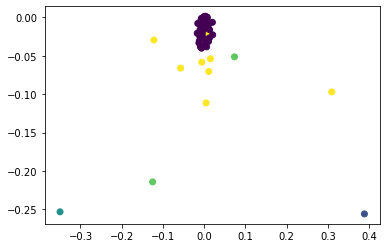

In [ ]:
film2=np.array(film2)
kmeans = KMeans(n_clusters=5, random_state=0).fit(film2)
y_kmeans = kmeans.predict(film2)
labels=kmeans.labels_
plt.scatter(film2[:, 0], film2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3","معنی4","معنی5"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":film[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":film[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":film[i]}, ignore_index=True)
  elif labels[i]==3:
    df=df.append({"معنی4":film[i]}, ignore_index=True)
  elif labels[i]==4:
    df=df.append({"معنی5":film[i]}, ignore_index=True)

df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2,معنی3,معنی4,معنی5
0,=== فیلم و سینما ===,در ۱۸۹۴ او در ترکیب فیلم و صدا تحقیقاتی کرد که...,از دیگر فعالیتهای او در دهه ۹۰ را میتوان به اج...,میرزا ابراهیمخان صحافباشی نخستین سالن نمایش فی...,مدیران استودیوهای فیلم اهل ایالات متحده آمریکا
1,== فیلم مستند ==,,,نخستین سینمای مدرن ایرانی نیز گراند سینمای تهر...,با انقلاب ۱۳۵۷، شماری از سینماهای تهران در آتش...
2,«مسافرت فرهنگ پاپ» گردشی که در آن افراد از محل...,,,,پس از سرنگونی طالبان، سینما به پیشرفتهایی نایل...
3,دوربین (Camera) : گرفتن عکس یا فیلم از مشتری ی...,,,,این اتمها اغلب با اتمهای دیگر واکنشهایی را انج...
4,نمایشگاه انفرادی در استودیو فیلم گلستان (تهران...,,,,علی شیرازی (خواننده سنتی) هشت قطعه از اشعار فر...
...,...,...,...,...,...
183,در سال ۱۹۶۲ فیلم «جادهٔ مارپیچ» به کارگرانی را...,,,,
184,"در فیلم ""سکوت بره هاً به نام سورینام به عنوان ...",,,,
185,کارگردانان فیلم اهل فرانسه,,,,
186,موزه هنر اسلامی دوحه بزرگترین مرکز فرهنگ اسلام...,,,,


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt film1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt film1.txt
ctx_00 w1  13094-n/0.757795 13501-n/0.235943 10353-n/0.0044784 13500-n/0.00139324 10149-n/0.000390043 !! فیلم


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt film2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt film2.txt
ctx_00 w3  13094-n/0.489347 13501-n/0.459474 10353-n/0.0242906 13500-n/0.0214455 10149-n/0.00544281 !! فیلم


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt film3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt film3.txt
ctx_00 w6  13094-n/0.706291 13501-n/0.195053 10353-n/0.0628244 13500-n/0.035037 10149-n/0.000794672 !! فیلم


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt film4.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt film4.txt
ctx_00 w2  13094-n/0.627679 13501-n/0.35058 13500-n/0.013011 10353-n/0.00794837 10149-n/0.000782502 !! فیلم


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt film5.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt film5.txt
ctx_00 w1  13094-n/0.692729 13501-n/0.293768 10353-n/0.00982126 13500-n/0.00331958 10149-n/0.000362514 !! فیلم


# هوش

In [ ]:
#num18
hosh= []
for i in wikitext:
  if " هوش " in i:
    if(len(i)<350):
         i=i.replace("\u200c","")
         hosh.append(i.rstrip("\n"))

#hosh=hosh[:200]


In [ ]:
hosh2=[]
c=0
sum=0
for i in hosh:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    hosh2.append(np.array(sum))

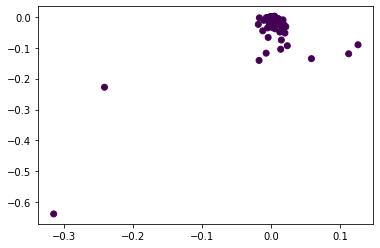

In [ ]:
hosh2=np.array(hosh2)
kmeans = KMeans(n_clusters=1, random_state=0).fit(hosh2)
y_kmeans = kmeans.predict(hosh2)
labels=kmeans.labels_
plt.scatter(hosh2[:, 0], hosh2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":hosh[i]}, ignore_index=True)

df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1
0,ادیسون گفته بود که به خدا، چنانکه در الهیات مط...
1,وی در سال ۲۰۱۴ خواستار پایان دادن به جنگ داخلی...
2,در همین سالها ریچارد استالمن در آزمایشگاه هوش ...
3,از آن جمله فراهنجارها میتوان به بخت (شانس)، هو...
4,=== هوش مصنوعی و تکینگی فناوری ===
...,...
195,از متهمان آزمونهای رورشاخ، درک موضوعی و وکسلر-...
196,نظامالدین فقیه، هوش مصنوعی در پیش بینی ایست خط...
197,نرمافزار هوش مصنوعی IFS Illusions
198,| هوش مصنوعی || هالی جوئل آزمنت|| پسربچه نقش ا...


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt hosh.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt hosh.txt
ctx_00 w1  11317-n/0 !! هوش


# سال

In [ ]:
#num19
sal= []
for i in wikitext:
  if " سال " in i:
    if(len(i)<350):
         i=i.replace("\u200c","")
         sal.append(i.rstrip("\n"))

#sal=sal[:200]


In [ ]:
sal2=[]
c=0
sum=0
for i in sal:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    sal2.append(np.array(sum))

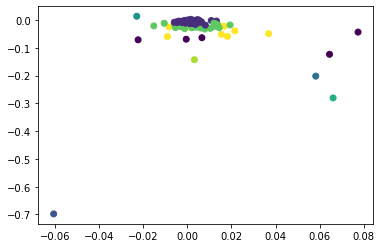

In [ ]:
sal2=np.array(sal2)
kmeans = KMeans(n_clusters=9, random_state=0).fit(sal2)
y_kmeans = kmeans.predict(sal2)
labels=kmeans.labels_
plt.scatter(sal2[:, 0], sal2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3","معنی4","معنی5","معنی6","معنی7","معنی8","معنی9"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":sal[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":sal[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":sal[i]}, ignore_index=True)
  elif labels[i]==3:
    df=df.append({"معنی4":sal[i]}, ignore_index=True)
  elif labels[i]==4:
    df=df.append({"معنی5":sal[i]}, ignore_index=True)
  elif labels[i]==5:
    df=df.append({"معنی6":sal[i]}, ignore_index=True)
  elif labels[i]==6:
    df=df.append({"معنی7":sal[i]}, ignore_index=True)
  elif labels[i]==7:
    df=df.append({"معنی8":sal[i]}, ignore_index=True)
  elif labels[i]==8:
    df=df.append({"معنی9":sal[i]}, ignore_index=True)

df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2,معنی3,معنی4,معنی5,معنی6,معنی7,معنی8,معنی9
0,سایر منابع مربوط به جشنواره روز آزادی نرمافزار...,=== یادوارهٔ هفتصدمین سال تصنیف گلستان و بوستا...,سالنامهها یا وقایعنامهها (به انگلیسی: Annals، ...,در سالهای ۱۹۹۰ و ۲۰۰۰ واژه ویکی هم به وبگاههای...,۱۹۰۹: ماهاتما گاندی: یکی از جدیدترین انتشارات ...,سعدی به احتمال زیاد در سال ۶۰۶ هجری قمری (براب...,این مجموعه در سال ۱۳۵۴ در فهرست آثار ملی ایران...,سعدی در حدود سال ۶۵۵ قمری به شیراز بازگشت و در...,کتاب گلستان یکی از نخستین کتابهای فارسی است که...
1,تاریخ مرگ سعدی را در منابع گوناگون، یکی از سال...,طول زمانیِ سال گریگوری -> ۳۶۵٬۲۴۲۵ روز = (۳:۴۰...,,,,,در سال تولد آیزاک نیوتن، جنگهای داخلی انگلستان...,,مرکز سعدیشناسی، از سال ۱۳۸۱ خورشیدی، روز ۱ ارد...
2,یکی از نخستین رمانهای فارسی، مجموعهٔ سهگانهای ...,دورهٔ عقبماندگی یکروزهٔ گاهشماری گریگوری -> ۳۳...,,,,,در ۱۶۹۶ نیوتن رئیس ضرابخانهٔ سلطنتی و چند سال ...,,سال ۱۳۱۶ خورشیدی مصادف با ۱۳۵۶ هجری قمری، هفتص...
3,محل دفن سعدی، خانقاهی بود که او در سالهای پایا...,شب سال نو,,,,,در کنار کارهای علمی، نیوتن از مسئولیتهای حکومت...,,ابن بزاز عارف و نویسندهٔ سدهٔ هشتم و نویسندهٔ ...
4,در سال ۱۱۸۷ هجری قمری به دستور کریمخان زند، یک...,از آثار عماد میتوان به «یک شب در بهشت» مثنوی ح...,,,,,هر سال در گاهشماری گرگوری ۱۲ ماه دارد. نام ماه...,,دیوان قصاید و غزلیات این دیوان را جامی در سال ...
...,...,...,...,...,...,...,...,...,...
141,,اولین دانشگاه ساخته شده در استان مدرسه علوم عا...,,,,,,,
142,,استان مرکزی دارای ۷۸ مرکز آموزش عالی است که از...,,,,,,,
143,,تیم فوتسال شن سا: قهرمان نخستین دوره جام باشگا...,,,,,,,
144,,تیم فوتسال شهرداری ساوه: نماینده استان در لیگ ...,,,,,,,


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt sal1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt sal1.txt
ctx_00 w1  12651-n/0.555537 12654-n/0.274856 12652-n/0.0645026 12653-n/0.0494019 13238-n/0.0224183 28564-n/0.0117997 13471-n/0.0095572 12915-n/0.00655555 13473-n/0.00537178 !! سال


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt sal2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt sal2.txt
ctx_00 w1  13238-n/0.861784 12653-n/0.0311975 12654-n/0.0248706 12915-n/0.0214915 12651-n/0.0205007 28564-n/0.0127412 12652-n/0.0108124 13471-n/0.00939588 13473-n/0.00720609 !! سال


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt sal3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt sal3.txt
ctx_00 w2  12651-n/0.336876 12653-n/0.233479 12915-n/0.150839 12654-n/0.141016 12652-n/0.0836104 28564-n/0.0303889 13471-n/0.0114804 13238-n/0.0103433 13473-n/0.0019667 !! سال


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt sal4.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt sal4.txt
ctx_00 w6  13238-n/0.233822 12653-n/0.203995 12915-n/0.120798 12651-n/0.116268 12654-n/0.0884825 28564-n/0.0759225 13471-n/0.0656413 12652-n/0.0484152 13473-n/0.0466558 !! سال


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt sal5.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt sal5.txt
ctx_00 w6  12651-n/0.212466 13238-n/0.170251 12653-n/0.14887 12915-n/0.121553 13471-n/0.0994716 12654-n/0.0795258 28564-n/0.0749168 13473-n/0.0467278 12652-n/0.0462192 !! سال


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt sal6.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt sal6.txt
ctx_00 w2  12651-n/0.558678 12654-n/0.27648 12652-n/0.0665231 12653-n/0.0504914 13238-n/0.013387 13471-n/0.0123772 28564-n/0.0111537 12915-n/0.00577793 13473-n/0.00513189 !! سال


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt sal7.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt sal7.txt
ctx_00 w1  12653-n/0.244119 12651-n/0.144155 12915-n/0.134976 28564-n/0.130723 13471-n/0.119052 12654-n/0.102251 13473-n/0.0599999 12652-n/0.0461548 13238-n/0.0185686 !! سال


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt sal8.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt sal8.txt
ctx_00 w2  12652-n/0.23311 12651-n/0.20475 12654-n/0.186627 12653-n/0.140937 28564-n/0.102783 13473-n/0.049639 13471-n/0.0342391 12915-n/0.0266195 13238-n/0.0212961 !! سال


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt sal9.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt sal9.txt
ctx_00 w1  12915-n/0.222406 12653-n/0.165198 12651-n/0.14572 13238-n/0.140048 13471-n/0.0936413 12654-n/0.0734527 12652-n/0.0649534 28564-n/0.0620864 13473-n/0.0324942 !! سال


# زمین

In [ ]:
zamin= []
for i in wikitext:
  if " زمین " in i:
    if(len(i)<350):
         i=i.replace("\u200c","")
         zamin.append(i.rstrip("\n"))

#zamin=zamin[:200]


In [ ]:
zamin2=[]
c=0
sum=0
for i in zamin:
    sentence = Sentence(i)
    stacked_embeddings.embed(sentence)
    for token in sentence:
        sum+=token.embedding
        c+=1
    sum=sum / c
    zamin2.append(np.array(sum))

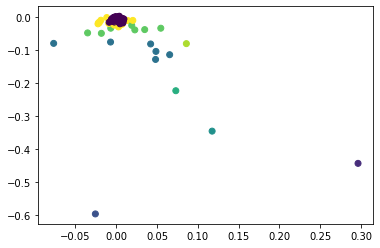

In [ ]:
zamin2=np.array(zamin2)
kmeans = KMeans(n_clusters=9, random_state=0).fit(zamin2)
y_kmeans = kmeans.predict(zamin2)
labels=kmeans.labels_
plt.scatter(zamin2[:, 0], zamin2[:, 1], c=y_kmeans, cmap='viridis')
plt.show()

In [ ]:
df = pd.DataFrame(columns=["معنی1","معنی2","معنی3","معنی4","معنی5","معنی6","معنی7","معنی8","معنی9"])
for i in range(200):
  if labels[i]==0:
    df=df.append({"معنی1":zamin[i]}, ignore_index=True)
  elif labels[i]==1:
    df=df.append({"معنی2":zamin[i]}, ignore_index=True)
  elif labels[i]==2:
    df=df.append({"معنی3":zamin[i]}, ignore_index=True)
  elif labels[i]==3:
    df=df.append({"معنی4":zamin[i]}, ignore_index=True)
  elif labels[i]==4:
    df=df.append({"معنی5":zamin[i]}, ignore_index=True)
  elif labels[i]==5:
    df=df.append({"معنی6":zamin[i]}, ignore_index=True)
  elif labels[i]==6:
    df=df.append({"معنی7":zamin[i]}, ignore_index=True)
  elif labels[i]==7:
    df=df.append({"معنی8":zamin[i]}, ignore_index=True)
  elif labels[i]==8:
    df=df.append({"معنی9":zamin[i]}, ignore_index=True)

df = df.apply(lambda x: pd.Series(x.dropna().values))
df = df.fillna('')
df

,معنی1,معنی2,معنی3,معنی4,معنی5,معنی6,معنی7,معنی8,معنی9
0,=== زمین لرزه ===,سنتاگزوپری برندهٔ جوایز ادبی معتبر فرانسه و هم...,با توجه به معنای واژه، «اخترشناسی» به «مطالعهٔ...,قرار داشتن زمین در کهکشان راهشیری، به عنوان مج...,ستارهشناسان بعدی، حرکات اجرام آسمانی را برمبنا...,البته امروزه روشهای مختلف دیگری که خیلی دقیقتر...,از زمانی که خورشید وارد مرحلهٔ رشته اصلی شده ت...,غیر از کهکشان ما، کهکشانهای دیگری نیز وجود دار...,در سطح جمعیتهای وابسته به هم و زیستگاههای ایشا...
1,مجموعه ورزشی کارگران (شامل بخشهای: استخر، زمین...,,,منبع اصلی ما برای به دست آوردن اطلاعات دربارهٔ...,,,دورهٔ چهارم از سال ۱۳۵۷ تا ۱۳۶۵ که سالهای نخست...,,به دلیل اینکه مردم تهران هنگام حملهٔ دشمن زیر ...
2,=== پیدایش عناصر بر روی زمین ===,,,برای مشاهده منابع پرانرژی از اخترشناسی انرژی ب...,,,فوتبال ورزش نخست تهران است و شهرآورد تهران میا...,,کوهستان هندوکش در شمال شرق افغانستان منطقهای ف...
3,=== فراوانی بر روی زمین ===,,,یکی از قدیمیترین زمینههای تحقیقاتی در علم اختر...,,,رودکی با وجود تقدم نسبت به شاعران بزرگ ایران ز...,,در نهاوند به دلیل آهکی بودن زمین، آب حاصل از ب...
4,=== درون زمین ===,,,اندازهگیری دقیق موقعیت مکانی سیارات به درک ما ...,,,در سال ۱۹۹۸ زلزلهای در این منطقه جان ۶ هزار نف...,,تعداد شهرکهای صنعتی در استان مرکزی به ۳۵ شهرک ...
...,...,...,...,...,...,...,...,...,...
156,در آخرین بازی دور اول مقدماتی، تیم ملی ایران د...,,,,,,,,
157,== نقشههایی برای دور زمین گشتن ==,,,,,,,,
158,=== گشتن به دور زمین ===,,,,,,,,
159,در ۶ سپتامبر ۱۵۲۲ میلادی - سه سال بعد از ترک ا...,,,,,,,,


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt zamin1.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt zamin1.txt
ctx_00 w1  13274-n/0.529673 12161-n/0.186503 13300-n/0.099686 13297-n/0.0903346 13299-n/0.0461304 11911-n/0.0178812 13273-n/0.01206 12567-n/0.00902293 10355-n/0.00870871 !! زمین


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt zamin2.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt zamin2.txt
ctx_00 w6  13274-n/0.26621 12161-n/0.195553 13299-n/0.181314 13297-n/0.149525 13300-n/0.097247 11911-n/0.0430601 13273-n/0.0259832 12567-n/0.0212214 10355-n/0.0198867 !! زمین


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt zamin3.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt zamin3.txt
ctx_00 w1  13297-n/0.721795 13299-n/0.11178 11911-n/0.0761108 10355-n/0.0244162 12161-n/0.0234512 13300-n/0.0188968 13274-n/0.0115326 13273-n/0.00731221 12567-n/0.00470548 !! زمین


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt zamin4.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt zamin4.txt
ctx_00 w6  12567-n/0.805718 13297-n/0.0606801 13300-n/0.0543558 13299-n/0.0321081 12161-n/0.0129894 13274-n/0.0117965 11911-n/0.0103589 10355-n/0.00662401 13273-n/0.00536919 !! زمین


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt zamin5.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt zamin5.txt
ctx_00 w2  13297-n/0.390927 13299-n/0.173146 12161-n/0.10229 13274-n/0.101231 13300-n/0.0934783 11911-n/0.0563912 10355-n/0.0496989 12567-n/0.0194709 13273-n/0.0133667 !! زمین


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt zamin6.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt zamin6.txt
ctx_00 w1  13297-n/0.902161 13299-n/0.049565 11911-n/0.0109642 13300-n/0.00908785 12567-n/0.00845854 10355-n/0.00784372 12161-n/0.0074639 13274-n/0.00323829 13273-n/0.0012173 !! زمین


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt zamin7.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt zamin7.txt
ctx_00 w1  13297-n/0.406787 13274-n/0.276321 12161-n/0.0982057 13300-n/0.0962744 13299-n/0.0816204 11911-n/0.0182925 10355-n/0.0109281 13273-n/0.00645991 12567-n/0.00511075 !! زمین


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt zamin8.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt zamin8.txt
ctx_00 w1  12161-n/0.859195 13297-n/0.0736391 13299-n/0.0203847 13274-n/0.0185671 13300-n/0.0106686 11911-n/0.00549091 13273-n/0.00532375 10355-n/0.00434741 12567-n/0.00238391 !! زمین


In [ ]:
! ./ukb_wsd --ppr_w2w --allranks  -K fn3.bin -D DICT_TEST.txt zamin9.txt 

!! -v 2.2 ./ukb_wsd --ppr_w2w --allranks -K fn3.bin -D DICT_TEST.txt zamin9.txt
ctx_00 w6  12161-n/0.454999 13297-n/0.12715 13299-n/0.11508 13300-n/0.0827611 13273-n/0.0814121 13274-n/0.0780347 11911-n/0.0246975 10355-n/0.0220424 12567-n/0.0138228 !! زمین


### **Final resault**

In [ ]:
import pandas as pd

In [ ]:
final=pd.read_excel('/content/mydrive/My Drive/nlpproject/final.xlsx')


In [ ]:
final = final.fillna('')
final=final.set_index('word')


In [ ]:

final

,معنی1,معنی2,معنی3,معنی4,معنی5,معنی6,معنی7,معنی8,معنی9,معنی انتخابی,code
word,,,,,,,,,,,
کارشناس,0.0120,0.986,,,,,,,,معنی 2,13328
بازار,0.0740,0.291,0.158,0.259,0.0899,0.049,0.0455,0.025,,معنی2,10713
چهره,0.1090,0.215,0.0504,0.634,0.157,0.28,,,,معنی4,12016
اخبار,0.5460,0.452,,,,,,,,معنی1,11465
مسابقه,0.0460,0.826,0.09,0.003,,,,,,معنی2,10538
حوزه,0.0060,0.07,0.04,0.864,,,,,,معنی4,14259
ماشین,0.7500,0.228,0.016,,,,,,,معنی1,10885
چشم,0.9920,0.013,0.059,,,,,,,معنی1,10314
فضا,0.0040,0.012,0.0302,0.458,0.421,0.052,0.023,,,معنی4,14953


### **Test**

In [ ]:
da=open('/content/mydrive/My Drive/nlpproject/TestSet.txt',"r")
dataset=da.read()
test=dataset.split("!!!")


In [ ]:
word=['کارشناس', 'بازار', 'چهره', 'اخبار', 'مسابقه', 'حوزه', 'ماشین', 'چشم',
       'فضا', 'موسسه', 'نمایشگاه', 'نقاشی', 'دروازه', 'داور', 'بازی',
       'فیلم', 'هوش', 'سال', 'زمین']

In [ ]:
sum=0
num=0
dic2={'کارشناس':0, 'بازار':0, 'چهره':0, 'اخبار':0, 'مسابقه':0, 'حوزه':0, 'ماشین':0, 'چشم':0, 'فضا':0, 'موسسه':0, 'نمایشگاه':0, 'نقاشی':0, 'دروازه':0, 'داور':0, 'بازی':0,'فیلم':0, 'هوش':0, 'سال':0, 'زمین':0}
dic={'کارشناس':0, 'بازار':0, 'چهره':0, 'اخبار':0, 'مسابقه':0, 'حوزه':0, 'ماشین':0, 'چشم':0, 'فضا':0, 'موسسه':0, 'نمایشگاه':0, 'نقاشی':0, 'دروازه':0, 'داور':0, 'بازی':0,'فیلم':0, 'هوش':0, 'سال':0, 'زمین':0}
for i in test:
  s=i.split('**')
  
  if s[0] in word:
    b=s[0]
    dic[s[0]]+=1
    a=int(final['code'][b])
    n=int(s[3])
    if a==n:
      dic2[s[0]]+=1
    

In [ ]:
precision=sum/num
precision

0.5370370370370371

In [ ]:
pre=pd.read_excel('/content/mydrive/My Drive/nlpproject/pre.xlsx')

In [ ]:
pre

,word,دقت
0,کارشناس,100
1,بازار,0
2,چهره,0
3,اخبار,100
4,مسابقه,90
5,حوزه,100
6,ماشین,100
7,چشم,100
8,فضا,0
9,موسسه,0
